In [1]:
%cd ..

c:\Users\esper\Desktop\injury_forecasting


In [20]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import importlib
from src.plotting import set_plot_style
from src.eda import *
from src.config import DATA_DIR, FIGURES_DIR
from src.timeseries_utils import *
importlib.reload(src.timeseries_utils)
set_plot_style()

In [3]:
df = pd.read_csv(DATA_DIR / "processed" / "federal_df.csv", parse_dates=['EventDate'], low_memory=False)

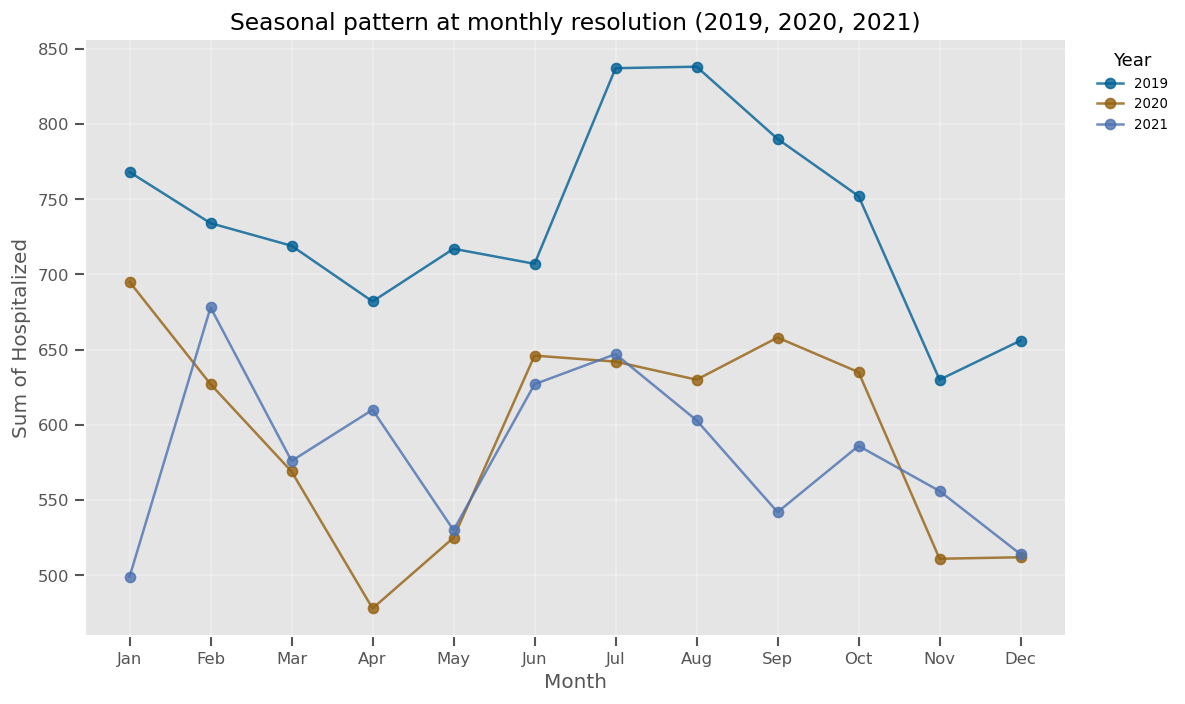

In [44]:
seasonality = plot_monthly_seasonality(df, date_col="EventDate", value_col = "Hospitalized", years=[2019,2020,2021])


c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:229: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  


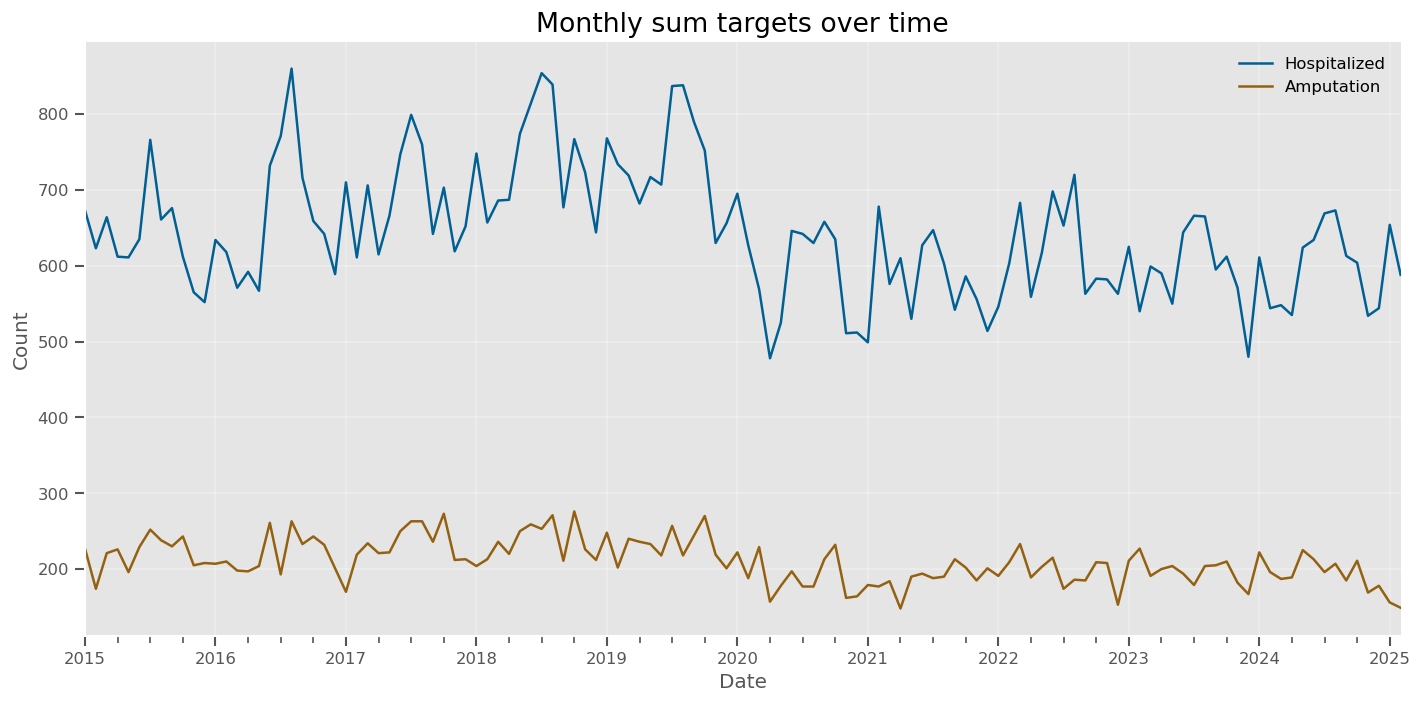

In [45]:
plot_target_timeseries(df, agg_level="monthly")

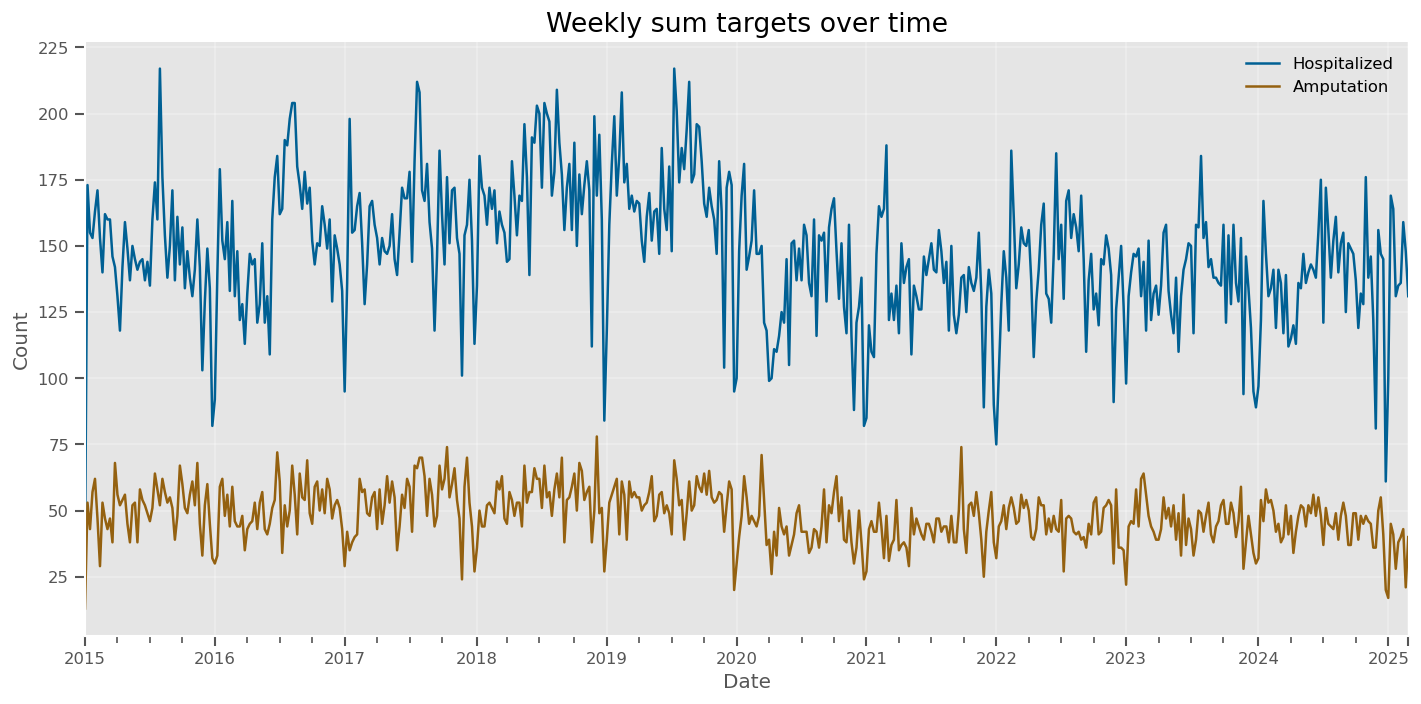

In [46]:
plot_target_timeseries(df, agg_level="weekly")

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:347: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  



Normality tests for: Hospitalized
Shapiro-Wilk W = 0.9760, p = 0.0279
→ Reject normality (p < 0.05)

Anderson-Darling statistic = 0.7375
Critical values (sig_level %, critical_value):
  15.0%  →  0.5590
  10.0%  →  0.6360
  5.0%  →  0.7630
  2.5%  →  0.8900
  1.0%  →  1.0590

Skewness  = 0.4987
Kurtosis = -0.0729

Normality tests for: Amputation
Shapiro-Wilk W = 0.9893, p = 0.4582
→ Fail to reject normality (p ≥ 0.05)

Anderson-Darling statistic = 0.2673
Critical values (sig_level %, critical_value):
  15.0%  →  0.5590
  10.0%  →  0.6360
  5.0%  →  0.7630
  2.5%  →  0.8900
  1.0%  →  1.0590

Skewness  = 0.1693
Kurtosis = -0.3607


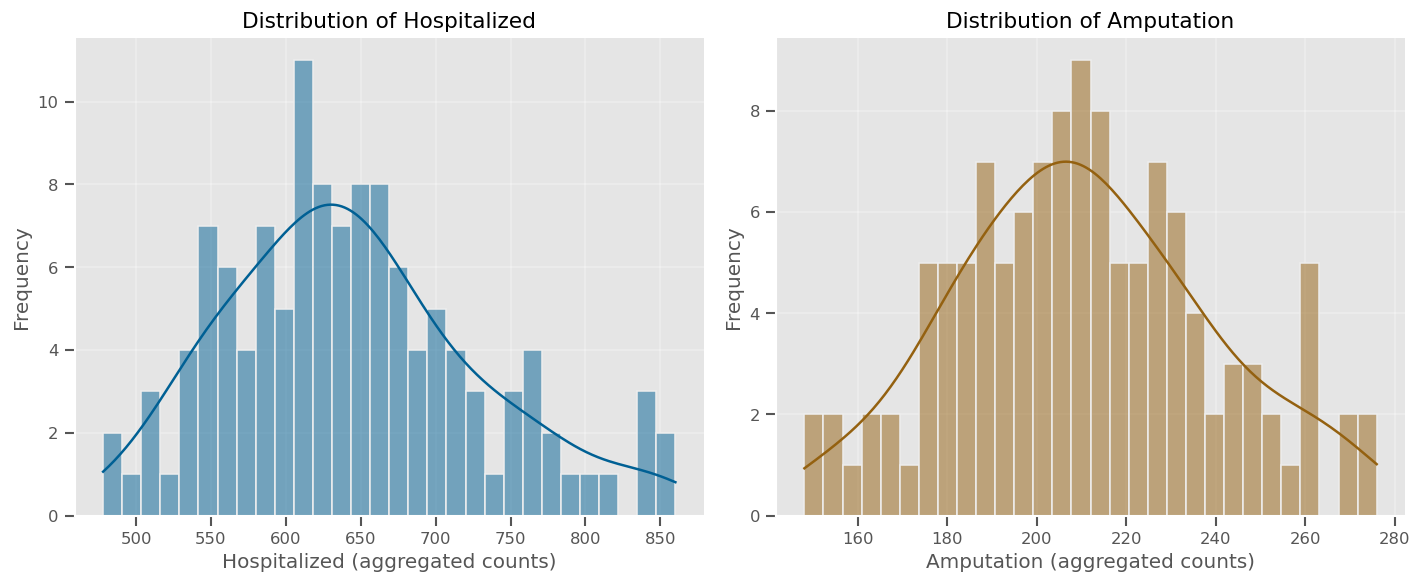

In [47]:
plot_target_histograms(df, agg_level="monthly")

In [28]:
df.head()

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,...,Part of Body Title,Event,EventTitle,Source,SourceTitle,FederalState,Year,NatureGroup,NatureGroupLabel,BodyPartDivision
0,2015010015,931176,2015-01-01,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,...,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,1,2015,11,Unspecified traumatic injuries,Lower Extremities
1,2015010016,930267,2015-01-01,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,...,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",1,2015,15,Sprains/Strains/Tears,Lower Extremities
2,2015010018,929823,2015-01-01,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,...,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",1,2015,10,Other/Unclassified,Other/Unclassified
3,2015010019,929711,2015-01-01,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,...,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,1,2015,19,Other traumatic injuries,Lower Extremities
4,2015010020,929642,2015-01-01,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,...,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",1,2015,11,Unspecified traumatic injuries,Upper Extremities


c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  


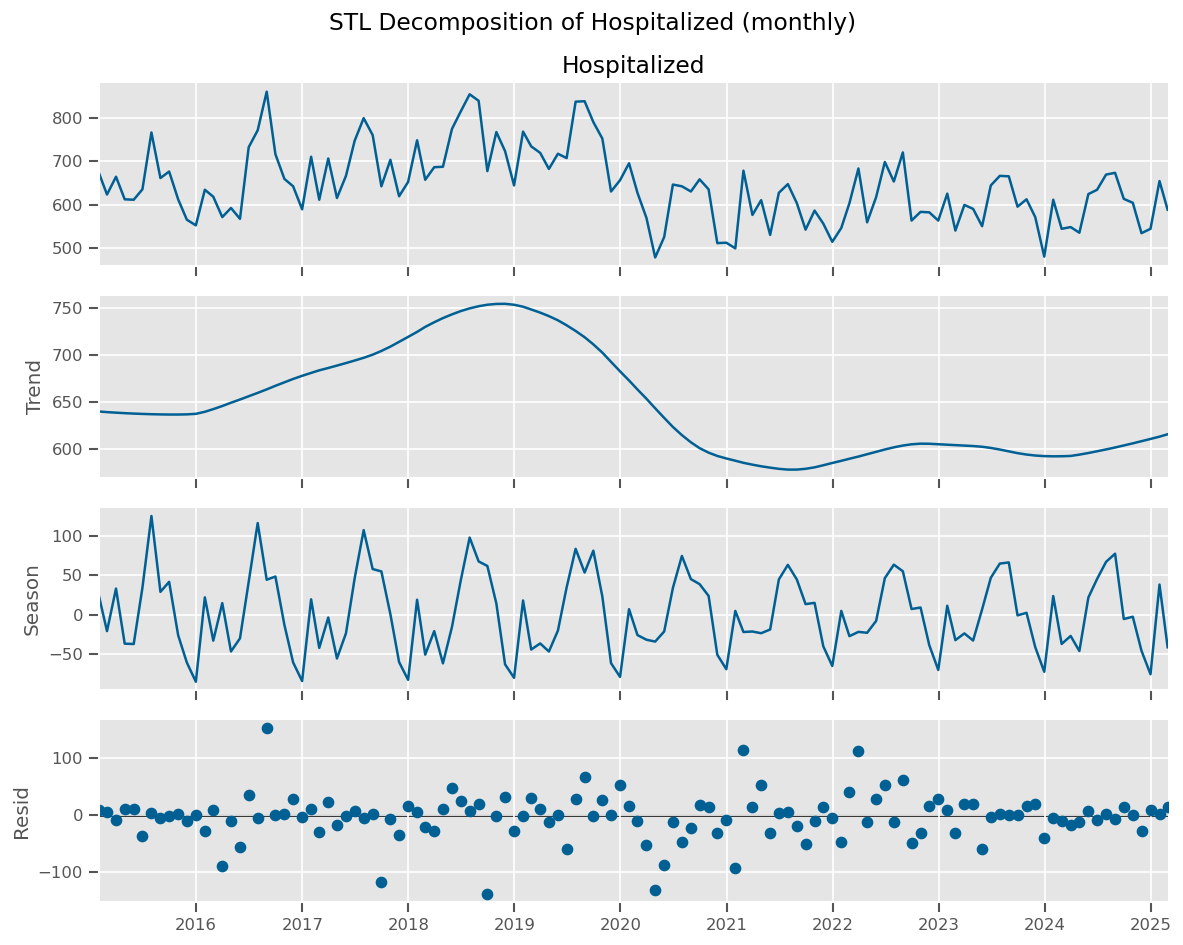

In [48]:
stl_decompose(df, date_col="EventDate")

In [49]:
ts = prepare_series(df, date_col="EventDate", value_col="Hospitalized", freq='ME')

In [50]:
stationarity_tests(ts)

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print(f"\n=== {state} ===\n")


,statistic,pvalue,lags,nobs,critical_values,verdict
test,,,,,,
ADF,-1.338015,0.611606,13,108,"{'1%': -3.4924012594942333, '5%': -2.888696819...",non-stationary
KPSS,0.780503,0.010000,5,122,"{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...",non-stationary


In [51]:
suggestion_global = suggest_differencing(ts)

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")


In [52]:
print(suggestion_global["recommended"])

{'d': 1, 'D': 0, 'season_period': None}


In [53]:
diff_summary = suggest_differencing_by_state(
    df,
    state_col="State",
    date_col="EventDate",
    value_col="Hospitalized",
    freq="ME",
    season_period=12,
)

print(diff_summary)

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual

                   State  d  D  season_period
0                ALABAMA  0  0             12
1               ARKANSAS  1  0             12
2               COLORADO  1  0             12
3            CONNECTICUT  0  0             12
4               DELAWARE  0  0             12
5   DISTRICT OF COLUMBIA  1  0             12
6                FLORIDA  0  0             12
7                GEORGIA  0  0             12
8                  IDAHO  0  0             12
9               ILLINOIS  1  0             12
10                KANSAS  0  0             12
11             LOUISIANA  1  0             12
12                 MAINE  0  0             12
13         MASSACHUSETTS  1  0             12
14           MISSISSIPPI  1  0             12
15              MISSOURI  0  0             12
16               MONTANA  0  0             12
17              NEBRASKA  0  0             12
18         NEW HAMPSHIRE  0  0             12
19            NEW JERSEY  0  0             12
20              NEW YORK  1  0    

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual